## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

- Провести разведочный анализ данных, посмотреть на датасет, есть ли пропуски - посмотреть на зависимости признаков
- Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clients.csv')
df.head()


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


Перевел футы в метры, привел цену в формат числа, вычеслил возраст и возрастную групу

In [30]:
df['Area (m2)'] = df['Area (ft.)'] * 0.092903
df['Price'] = df['Price'].replace(r'[$,]', '', regex=True).astype(float)
df['Age'] = df['Year of sale'] - df['Y']

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [31]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Area (m2),Age,Age Group
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,...,F,USA,California,Home,5,No,Website,69.035290,19.0,19-25
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,...,F,USA,California,Home,5,No,Website,70.254178,22.0,19-25
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,...,M,USA,California,Home,1,Yes,Client,54.560074,22.0,19-25
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,...,M,USA,California,Investment,3,Yes,Website,149.086089,22.0,19-25
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,...,F,USA,California,Home,4,No,Agency,127.783431,25.0,19-25


Если пол Nan значит юридические лицо

In [32]:
df["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [33]:

df_ind = df.dropna(subset=['Gender']).copy()
df_firm = df[df['Gender'].isna()].copy()

print(f"Физические лица: {len(df_ind)}")
print(f"Юридические лица: {len(df_firm)}")

Физические лица: 178
Юридические лица: 17


In [34]:
def print_stats(data, column_name, title):
    if column_name not in data.columns:
        return

    counts = data[column_name].value_counts(normalize=True) * 100

    print(f"{title}")
    print(counts.head(10).to_string(float_format="%.2f%%"))
    print()

In [35]:
print_stats(df_ind, 'Building', 'Этажность зданий')

Этажность зданий
Building
3   29.78%
2   29.21%
1   17.42%
4   12.92%
5   10.67%



In [36]:
print_stats(df_ind, 'Type of property', 'Тип недвижимости')

Тип недвижимости
Type of property
Apartment   98.88%
Office       1.12%



In [37]:
print_stats(df_ind, 'Year of sale', 'Год продажи')

Год продажи
Year of sale
2007   57.30%
2006   21.91%
2005    8.43%
2004    6.74%
2008    5.06%
2010    0.56%



In [38]:
print_stats(df_ind, 'Month of sale', 'Месяц продажи')

Месяц продажи
Month of sale
11   14.04%
3    12.36%
12   10.11%
10   10.11%
8    10.11%
6     8.43%
9     7.87%
4     7.30%
5     6.18%
7     4.49%



In [39]:

print_stats(df_ind, 'Age Group', 'Возрастные группы')

Возрастные группы
Age Group
36-45   29.21%
46-55   23.03%
26-35   20.22%
56-65   14.61%
65+     10.11%
19-25    2.81%



In [40]:
print_stats(df_ind, 'Gender', 'Пол')

Пол
Gender
M   60.67%
F   39.33%



In [41]:
print_stats(df_ind, 'Country', 'Страна')

Страна
Country
USA       88.20%
Canada     3.93%
Russia     2.25%
USA        1.69%
UK         1.12%
Belgium    1.12%
Denmark    0.56%
Germany    0.56%
Mexico     0.56%



In [42]:
print_stats(df_ind, 'State', 'Штат')

Штат
State
California   64.63%
Nevada        7.93%
Arizona       6.71%
Oregon        6.71%
Colorado      6.71%
Utah          3.66%
Virginia      2.44%
Kansas        0.61%
Wyoming       0.61%



In [43]:

print(f"Цены:")
print(f"Мин: ${df_ind['Price'].min():,.0f}")
print(f"Макс: ${df_ind['Price'].max():,.0f}")
print(f"Медиана: ${df_ind['Price'].median():,.0f}")

Цены:
Мин: $153,467
Макс: $503,790
Медиана: $245,197


In [44]:
print_stats(df_ind, 'Mortgage', 'Ипотека (Mortgage)')

Ипотека (Mortgage)
Mortgage
No    67.98%
Yes   32.02%



In [45]:
print_stats(df_ind, 'Deal satisfaction', 'Удовлетворенность сделкой')

Удовлетворенность сделкой
Deal satisfaction
5   33.15%
3   21.35%
4   21.35%
2   14.04%
1   10.11%



In [46]:
print_stats(df_ind, 'Purpose', 'Цель покупки')

Цель покупки
Purpose
Home         66.29%
Investment   33.71%



In [47]:

print_stats(df_ind, 'Source', 'Источник лида')

Источник лида
Source
Website   57.87%
Agency    32.58%
Client     9.55%



In [48]:
print_stats(df_firm, 'Purpose', 'Цель покупки')

Цель покупки
Purpose
Investment   94.12%
Home          5.88%



In [49]:
print_stats(df_firm, 'Building', 'Этажность зданий')

Этажность зданий
Building
1   88.24%
2   11.76%



In [50]:

print_stats(df_firm, 'Source', 'Источник')

Источник
Source
Website   94.12%
Agency     5.88%



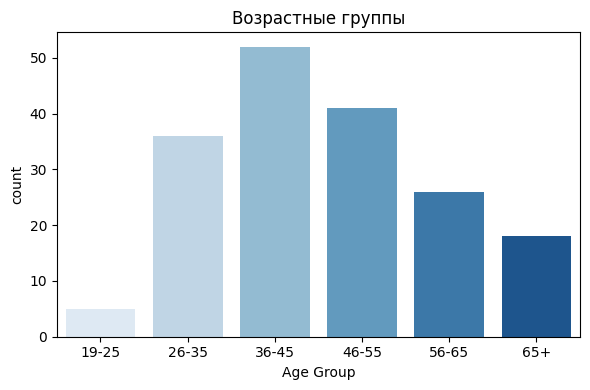

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df_ind,
    x='Age Group',
    hue='Age Group',
    palette='Blues',
    legend=False
)
plt.title('Возрастные группы')
plt.tight_layout()
plt.show()


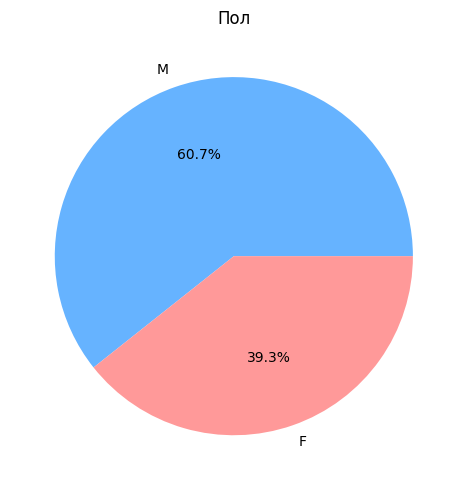

In [52]:
plt.figure(figsize=(5,5))
df_ind['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999']
)
plt.title('Пол')
plt.ylabel('')
plt.tight_layout()
plt.show()


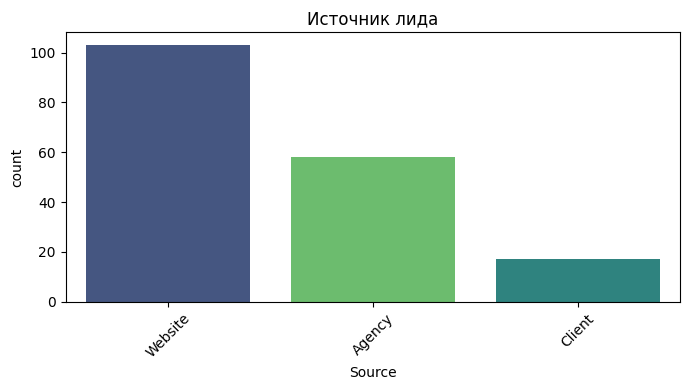

In [53]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=df_ind,
    x='Source',
    hue='Source',
    palette='viridis',
    order=df_ind['Source'].value_counts().index,
    legend=False
)
plt.title('Источник лида')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


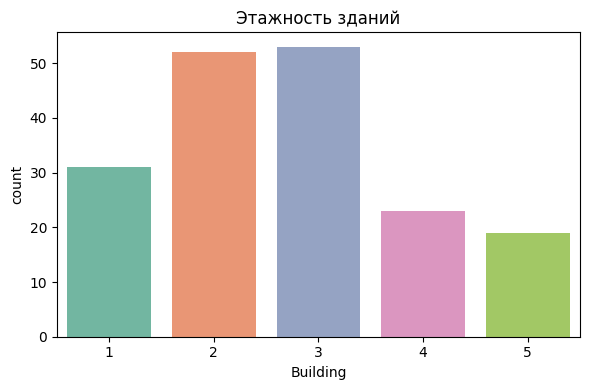

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df_ind,
    x='Building',
    hue='Building',
    palette='Set2',
    legend=False
)
plt.title('Этажность зданий')
plt.tight_layout()
plt.show()


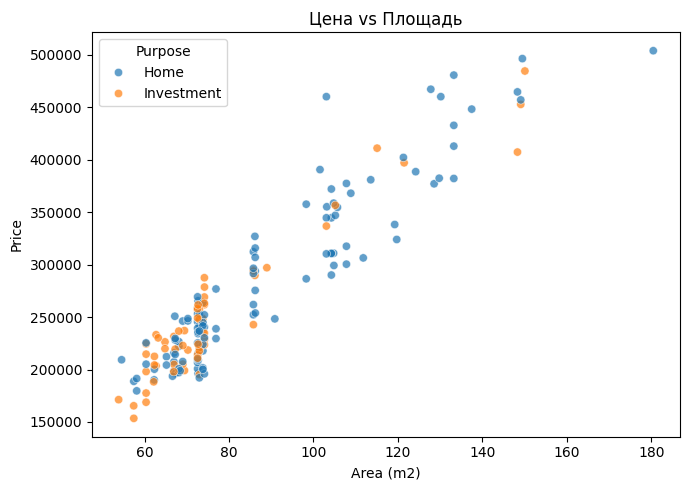

In [55]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_ind,
    x='Area (m2)',
    y='Price',
    hue='Purpose',
    alpha=0.7
)
plt.title('Цена vs Площадь')
plt.tight_layout()
plt.show()


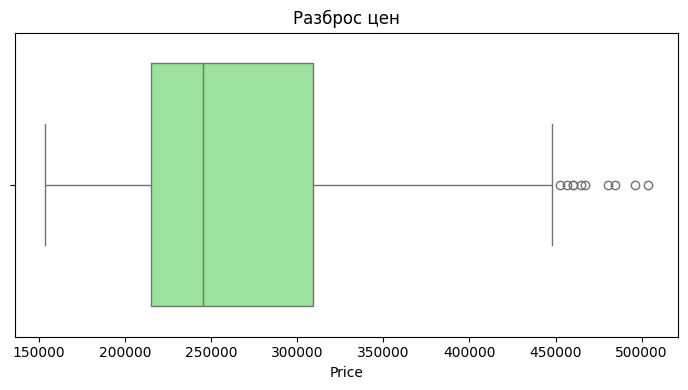

In [56]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df_ind['Price'], color='lightgreen')
plt.title('Разброс цен')
plt.tight_layout()
plt.show()


Типичный клиент компании - это мужчина в возрасте от 36 до 55 лет, проживающий в США (преимущественно в Калифорнии). Он нацелен на покупку апартаментов для собственного проживания в зданиях средней этажности (2-3 этаж). Средний чек сделки составляет около $245,000 за объект площадью порядка 70-75 м², при этом более 68% клиентов предпочитают закрывать сделку собственными средствами без привлечения ипотеки.

С точки зрения маркетинга, основным каналом привлечения является сайт компании, который генерирует почти 58% всех лидов, обеспечивая при этом высокий уровень удовлетворенности сделкой (оценки 4 и 5). Инвестиционные цели чаще преследуют юридические лица, которые выбирают объекты на первых этажах, в то время как физические лица формируют основной костяк покупателей жилья для жизни.